In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucasqueiros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/lucasqueiros/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Lendo os dados

Os dados são compostos por 3000 comentários sobre diferentes marcas no Twitter.

In [3]:
data = pd.read_csv('https://gist.githubusercontent.com/issilva5/993ff7c0d82fa3db85396740aaedbf63/raw/54242a8540a8c048775957f0f609ee5c774966bb/tweets.csv')

In [4]:
data.head()

,tid,page,sentiment,text
0,785,ApexLegends,Negative,Got Pred! Flew through plt 2 to dim 1 then we ...
1,13177,Xbox(Xseries),Negative,Where is everyone sayin how big the xbox was a...
2,9645,PlayStation5(PS5),Positive,Then Amazing.
3,3260,Facebook,Negative,Left Instagram because no body shows me love. ...
4,12758,WorldOfCraft,Negative,"Seriously, is it hard to make a good remake? G..."


In [5]:
data[['sentiment', 'text']].head(10)

,sentiment,text
0,Negative,Got Pred! Flew through plt 2 to dim 1 then we ...
1,Negative,Where is everyone sayin how big the xbox was a...
2,Positive,Then Amazing.
3,Negative,Left Instagram because no body shows me love. ...
4,Negative,"Seriously, is it hard to make a good remake? G..."
5,Positive,The price is incredible.
6,Positive,First Fifa I like in a long long while. A.I ac...
7,Negative,Y’all call of duty PRO kids lame as fuck. Y’al...
8,Positive,So i just had both a good TDM match as a snipe...
9,Negative,Leave those ugly crack ass pictures on Facebook.


# Processamento dos dados

In [7]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming (reduzir palavras aos seus radicais) to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

def processCorpus(corpus, language):
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)

    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)

        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

<>:28: SyntaxWarning: invalid escape sequence '\W'
<>:29: SyntaxWarning: invalid escape sequence '\S'
<>:30: SyntaxWarning: invalid escape sequence '\S'
<>:28: SyntaxWarning: invalid escape sequence '\W'
<>:29: SyntaxWarning: invalid escape sequence '\S'
<>:30: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_120063/1745253805.py:28: SyntaxWarning: invalid escape sequence '\W'
  corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
/tmp/ipykernel_120063/1745253805.py:29: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
/tmp/ipykernel_120063/1745253805.py:30: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)


In [8]:
teste = "oioio!!, poOpo"
re.sub('\W_',' ',teste)
word_tokenize(teste.casefold())

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipykernel_120063/801139752.py:2: SyntaxWarning: invalid escape sequence '\W'
  re.sub('\W_',' ',teste)


['oioio', '!', '!', ',', 'poopo']

In [9]:
corpus = processCorpus(data['text'].tolist(), 'english')

In [12]:
print('Texto original:', data['text'].tolist()[44])
print()
print('Texto processado:', corpus[44])
print()
print('-'*12)
print()
print('Texto original:', data['text'].tolist()[1876])
print()
print('Texto processado:', corpus[1876])

Texto original: I really hate how balance in the team separates you from your friends on Battlefield 4

Texto processado: realli hate balanc team separ friend battlefield

------------

Texto original: The big tech giants Twitter, Facebook and Google need to be broken up and regulated; they have proved themselves corrupt propagandists, control too much and are too powerful; their values are liberal and cannot control the flow of information; just look at their "Head of Integrity"! pic.twitter.com / otvpZWevy1

Texto processado: big tech giant twitter facebook googl need broken regul prove corrupt propagandist control much power valu liber control flow inform look head integr pic.twitter.com


# Treinando o modelo de Regressão Logística

Vetorização do texto processado:

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
y = data['sentiment'].to_numpy()

In [14]:
vectorizer.vocabulary_

{'got': 1846,
 'pred': 3247,
 'flew': 1617,
 'plt': 3200,
 'dim': 1196,
 'hit': 2027,
 'massiv': 2618,
 'wall': 4678,
 'everi': 1450,
 'game': 1741,
 'becam': 394,
 'struggl': 4121,
 'kept': 2320,
 'die': 1187,
 'noth': 2914,
 'go': 1816,
 'way': 4704,
 'want': 4683,
 'give': 1796,
 'suck': 4146,
 'grind': 1885,
 'took': 4370,
 'hrs': 2072,
 'get': 1781,
 'that': 4276,
 'bad': 338,
 'everyon': 1454,
 'sayin': 3689,
 'big': 439,
 'xbox': 4836,
 'fridg': 1696,
 'sound': 3987,
 'dumb': 1304,
 'hell': 1996,
 'lmao': 2478,
 'amaz': 138,
 'left': 2412,
 'instagram': 2192,
 'bodi': 505,
 'show': 3839,
 'love': 2521,
 'facebook': 1502,
 'feel': 1558,
 'twitter': 4466,
 'still': 4091,
 'spare': 3996,
 'serious': 3764,
 'hard': 1953,
 'make': 2579,
 'good': 1832,
 'remak': 3501,
 'gosh': 1844,
 'thought': 4306,
 'could': 962,
 'wors': 4809,
 'warcraft': 4686,
 'reforg': 3473,
 'definit': 1119,
 'wrong': 4823,
 'price': 3268,
 'incred': 2153,
 'first': 1600,
 'fifa': 1577,
 'like': 2449,
 'long':

In [15]:
y

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

Separação em treino e teste, na proporção 70/30:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

Treinando o modelo (.fit):

In [17]:
clr = LogisticRegression(random_state=0).fit(X_train, y_train)
cnb = MultinomialNB().fit(X_train, y_train)
cmlp = MLPClassifier(random_state=0, max_iter=300, hidden_layer_sizes=(128,16,)).fit(X_train, y_train)

# Prevendo e avaliando

Para prever o identificador da classe:

In [18]:
clr.predict(X_test)[:10]

array(['Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative'],
      dtype=object)

In [19]:
cnb.predict(X_test)[:10]

array(['Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative'],
      dtype='<U8')

In [20]:
cmlp.predict(X_test)[:10]

array(['Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype='<U8')

Para prever probabilidade de pertencer a cada classe:

In [21]:
clr.classes_

array(['Negative', 'Positive'], dtype=object)

In [22]:
clr.predict_proba(X_test)[:10]

array([[0.56489878, 0.43510122],
       [0.46262483, 0.53737517],
       [0.87507639, 0.12492361],
       [0.37412854, 0.62587146],
       [0.76765149, 0.23234851],
       [0.26652673, 0.73347327],
       [0.3275585 , 0.6724415 ],
       [0.46713045, 0.53286955],
       [0.52561443, 0.47438557],
       [0.53768899, 0.46231101]])

In [23]:
cnb.predict_proba(X_test)[:10]

array([[0.56002832, 0.43997168],
       [0.45794441, 0.54205559],
       [0.88114819, 0.11885181],
       [0.30892062, 0.69107938],
       [0.8195864 , 0.1804136 ],
       [0.22884122, 0.77115878],
       [0.41179556, 0.58820444],
       [0.41588438, 0.58411562],
       [0.50130127, 0.49869873],
       [0.50017158, 0.49982842]])

In [24]:
cmlp.predict_proba(X_test)[:10]

array([[9.71181785e-01, 2.88182147e-02],
       [5.74280254e-01, 4.25719746e-01],
       [9.99976509e-01, 2.34907506e-05],
       [3.34147383e-04, 9.99665853e-01],
       [7.76792202e-01, 2.23207798e-01],
       [7.50375186e-04, 9.99249625e-01],
       [3.77908081e-04, 9.99622092e-01],
       [1.36760956e-02, 9.86323904e-01],
       [4.25921680e-01, 5.74078320e-01],
       [1.11162526e-01, 8.88837474e-01]])

## Matriz de confusão

A matriz de confusão fornece um meio de avaliar o êxito de um problema de classificação e onde ele comete erros (ou seja, onde ele se torna "confuso").

In [26]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels=None) -> None:
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

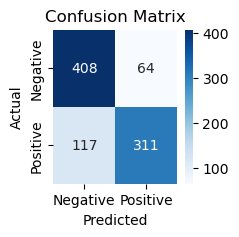

In [27]:
plot_confusion_matrix(y_test, clr.predict(X_test), labels=['Negative', 'Positive'])

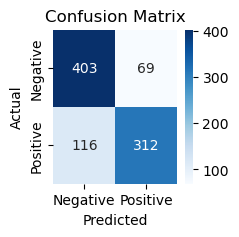

In [28]:
plot_confusion_matrix(y_test, cnb.predict(X_test), labels=['Negative', 'Positive'])

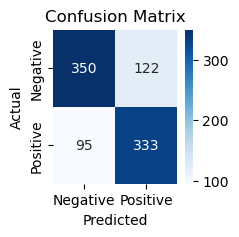

In [29]:
plot_confusion_matrix(y_test, cmlp.predict(X_test), labels=['Negative', 'Positive'])

## Relatório de classificação

In [30]:
print(classification_report(y_test, clr.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.78      0.86      0.82       472
    Positive       0.83      0.73      0.77       428

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900



In [31]:
print(classification_report(y_test, cnb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.78      0.85      0.81       472
    Positive       0.82      0.73      0.77       428

    accuracy                           0.79       900
   macro avg       0.80      0.79      0.79       900
weighted avg       0.80      0.79      0.79       900



In [32]:
print(classification_report(y_test, cmlp.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.79      0.74      0.76       472
    Positive       0.73      0.78      0.75       428

    accuracy                           0.76       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.76      0.76      0.76       900

